 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [58]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [59]:
# Reading whale returns
#data reading 
from sqlalchemy import false


whale_returns_path = Path("Resources/whale_returns.csv")
whale_returns = pd.read_csv(whale_returns_path, index_col= "Date" , parse_dates= True , infer_datetime_format= True ).sort_index(ascending = True)

whale_returns.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [60]:
# Count nulls
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [61]:
# Drop nulls and re-test
whale_returns = whale_returns.dropna()
whale_returns.isnull().sum()
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [62]:
# Reading algorithmic returns

Algo_returns_path = Path("Resources/algo_returns.csv")
Algo_returns = pd.read_csv(Algo_returns_path, index_col= "Date" , parse_dates= True , infer_datetime_format= True ).sort_index(ascending = True)

Algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [63]:
# Count nulls
Algo_returns.isnull().sum()


Algo 1    0
Algo 2    6
dtype: int64

In [64]:
# Drop nulls
Algo_returns = Algo_returns.dropna()
Algo_returns.isnull().sum()
Algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [65]:
# Reading S&P 500 Closing Prices
SP_returns_path = Path("Resources/sp500_history.csv")
SP_returns = pd.read_csv(SP_returns_path, index_col= "Date" , parse_dates= True , infer_datetime_format= True ).sort_index(ascending = True)

SP_returns.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [66]:
# Check Data Types
SP_returns.dtypes

Close    object
dtype: object

In [67]:
# Fix Data Types
SP_returns['Close'] = SP_returns['Close'].str.replace("$","")
SP_returns['Close'] = pd.to_numeric(SP_returns['Close'])
SP_returns.dtypes

c:\Users\joseo\anaconda3\envs\dev\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  


Close    float64
dtype: object

In [68]:
# Calculate Daily Returns
SP_returns = SP_returns.pct_change()
SP_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [69]:
# Drop nulls
SP_returns.dropna(inplace= True)
SP_returns.head()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [70]:
# Rename `Close` Column to be specific to this portfolio.
SP_returns = SP_returns.rename(columns={'Close':'SP_Close'})

## Combine Whale, Algorithmic, and S&P 500 Returns

In [71]:
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


In [72]:
Algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


In [73]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
All_returns = pd.concat([whale_returns, Algo_returns, SP_returns], axis= 'columns' , join = 'inner')
All_returns.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP_Close
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

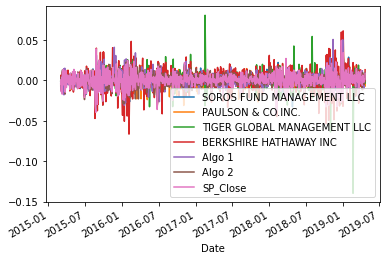

In [74]:
# Plot daily returns of all portfolios
All_returns.plot(kind='line')

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

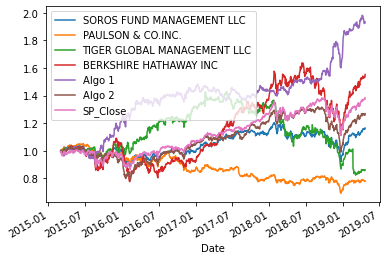

In [75]:
# Calculate cumulative returns of all portfolios

All_cum_returns = All_returns.add(1).cumprod()
All_cum_returns.describe()

# Plot cumulative returns


All_cum_returns.plot(kind = "line")

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

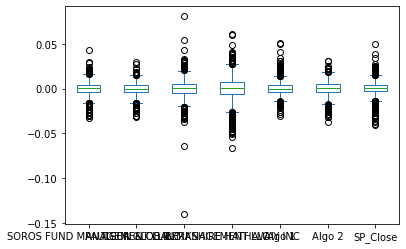

In [76]:
# Box plot to visually show risk
All_returns.plot.box()

### Calculate Standard Deviations

In [77]:
# Calculate the daily standard deviations of all portfolios
All_returns_STD = All_returns.std()
All_returns_STD


SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
SP_Close                       0.008554
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [78]:
# Calculate  the daily standard deviation of S&P 500
SP_STD = All_returns['SP_Close'].std()
# Determine which portfolios are riskier than the S&P 500

risky=[]
risky_index = 0
for i in All_returns_STD:
    if i - SP_STD > 0:
        risky.append(True)
        #print(All_returns_STD.index[risky_index])
    else:
        risky.append(False)

    risky_index += 1

print(All_returns_STD.loc[risky])
#print(All_returns_STD.loc[risky])

TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
dtype: float64


### Calculate the Annualized Standard Deviation

In [79]:
# Calculate the annualized standard deviation (252 trading days)

Ann_All_returns_STD = All_returns_STD * np.sqrt(252)
Ann_All_returns_STD

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
SP_Close                       0.135786
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:title={'center':'21-day rolling Standard Deviation'}, xlabel='Date'>

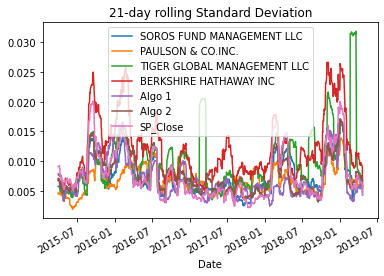

In [80]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
win_All_retirns_STD = All_returns.rolling(window = 21).std()

# Plot the rolling standard deviation
win_All_retirns_STD.plot(kind = 'line', title = '21-day rolling Standard Deviation')

### Calculate and plot the correlation

In [81]:
# Calculate the correlation

All_returns_corr = All_returns.corr()

# Display de correlation matrix
All_returns_corr 

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP_Close
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
SP_Close,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:title={'center':'60 day rolling beta'}, xlabel='Date'>

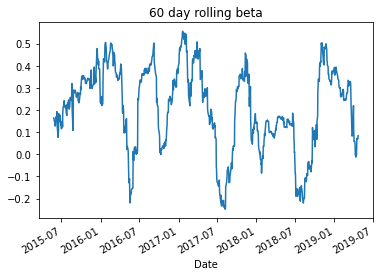

In [82]:
# Calculate covariance of a single portfolio


Algo_1_covar = All_returns['Algo 1'].rolling(window= 60).cov(All_returns['SP_Close']).dropna()

# Calculate variance of S&P 500
win_All_returns_var= All_returns['SP_Close'].rolling(window= 60).var().dropna()
win_All_returns_var = win_All_returns_var.to_frame()

# Computing beta

Beta_matrix = pd.concat([Algo_1_covar,win_All_returns_var], axis = 'columns', join= 'inner')

Beta_matrix.columns = ['COV', 'VAR'] 

beta_algo = Beta_matrix.loc[:,'COV']/Beta_matrix.loc[:,'VAR']
#beta_algo.head()

# Plot beta trend
beta_algo.plot(kind = 'line', title = '60 day rolling beta')

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

<AxesSubplot:xlabel='Date'>

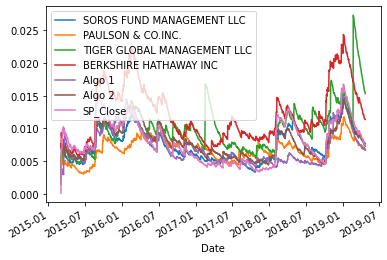

In [83]:
# Use `ewm` to calculate the rolling window
All_returns_ewm_std = All_returns.ewm(halflife= 21).std().dropna()

All_returns_ewm_std.plot(kind = 'line')


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [84]:
# Annualized Sharpe Ratios
Sharpe_ratios =  (All_returns.mean()*252) /  Ann_All_returns_STD
Sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
SP_Close                       0.648267
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

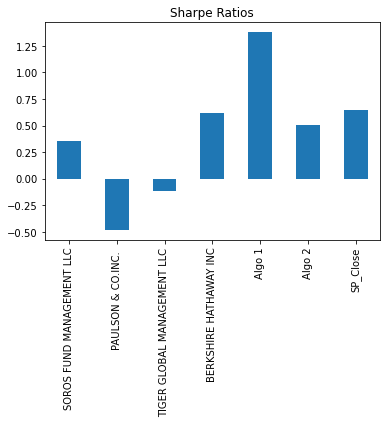

In [85]:
# Visualize the sharpe ratios as a bar plot
Sharpe_ratios.plot.bar(title = 'Sharpe Ratios')

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

The Algo 1 portfolio has out performed the "whales portfolios" and the market over the period of analysis. This is seen by the higher Sharpe ratio that the Algo 1 portfolio has compared to the S&P500 and the Berkshire portfolio. However, Algo 2 has not out performed the  Berkshire or the S&P 500. 

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [86]:
# Reading data from 1st stock

STK_1_returns_path = Path("Resources/aapl_historical.csv")
STK_1 = pd.read_csv(STK_1_returns_path, index_col= "Trade DATE" , parse_dates= True  ).sort_index(ascending = True)
STK_1 = STK_1.rename(columns= {'NOCP':'AAPL'})

STK_1.drop(columns = ['Symbol'], inplace = True)
STK_1.head()

,AAPL
Trade DATE,
2018-05-11,188.59
2018-05-14,188.15
2018-05-15,186.44
2018-05-16,188.18
2018-05-17,186.99


In [87]:
# Reading data from 2nd stock
STK_2_returns_path = Path("Resources/cost_historical.csv")
STK_2 = pd.read_csv(STK_2_returns_path, index_col= "Trade DATE" , parse_dates= True  ).sort_index(ascending = True)
STK_2 = STK_2.rename(columns= {'NOCP':'COST'})
STK_2.drop(columns = ['Symbol'], inplace = True)
STK_2.head()

,COST
Trade DATE,
2018-05-11,195.76
2018-05-14,195.88
2018-05-15,195.48
2018-05-16,198.71
2018-05-17,199.60


In [88]:
# Reading data from 3rd stock
STK_3_returns_path = Path("Resources/goog_historical.csv")
STK_3 = pd.read_csv(STK_3_returns_path, index_col= "Trade DATE" , parse_dates= True  ).sort_index(ascending = True)
STK_3 = STK_3.rename(columns= {'NOCP':'GOOG'})

STK_3.drop(columns = ['Symbol'], inplace = True)
STK_3.head()

,GOOG
Trade DATE,
2018-05-11,1098.26
2018-05-14,1100.20
2018-05-15,1079.23
2018-05-16,1081.77
2018-05-17,1078.59


In [89]:
# Combine all stocks in a single DataFrame

custom_port = pd.concat([STK_1, STK_2, STK_3], axis= "columns", join ="inner")
custom_port.describe

<bound method NDFrame.describe of               AAPL    COST     GOOG
Trade DATE                         
2018-05-11  188.59  195.76  1098.26
2018-05-14  188.15  195.88  1100.20
2018-05-15  186.44  195.48  1079.23
2018-05-16  188.18  198.71  1081.77
2018-05-17  186.99  199.60  1078.59
...            ...     ...      ...
2019-05-03  211.75  244.62  1185.40
2019-05-06  208.48  244.23  1189.39
2019-05-07  202.86  240.18  1174.10
2019-05-08  202.90  241.34  1166.27
2019-05-09  200.72  243.47  1162.38

[250 rows x 3 columns]>

In [90]:
# Reset Date index

custom_port.index = custom_port.index.date
custom_port.head()

,AAPL,COST,GOOG
2018-05-11,188.59,195.76,1098.26
2018-05-14,188.15,195.88,1100.20
2018-05-15,186.44,195.48,1079.23
2018-05-16,188.18,198.71,1081.77
2018-05-17,186.99,199.60,1078.59


In [91]:
# Reorganize portfolio data by having a column per symbol


In [92]:
# Calculate daily returns
custom_port_returns = custom_port.pct_change()

# Drop NAs
custom_port_returns = custom_port_returns.dropna()
# Display sample data
custom_port_returns.head()

,AAPL,COST,GOOG
2018-05-14,-0.002333,0.000613,0.001766
2018-05-15,-0.009088,-0.002042,-0.019060
2018-05-16,0.009333,0.016523,0.002354
2018-05-17,-0.006324,0.004479,-0.002940
2018-05-18,-0.003637,-0.003206,-0.011339


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [93]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
total_custom_port_return = custom_port_returns.dot(weights).to_frame()

# Display sample data
total_custom_port_return.columns = ["custom_return"]
total_custom_port_return.tail()


,custom_return
2019-05-03,0.013329
2019-05-06,-0.004557
2019-05-07,-0.018798
2019-05-08,-0.000547
2019-05-09,-0.001751


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [94]:
# Join your returns DataFrame to the original returns DataFrame

All_returns_2 = All_returns 
All_returns_2 = pd.concat([All_returns_2, total_custom_port_return], axis= 'columns')
All_returns_2.head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP_Close,custom_return
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539,NaN
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389,NaN
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196,NaN
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174,NaN
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944,NaN


In [95]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
All_returns_2 = All_returns_2.dropna()
All_returns_2.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP_Close,custom_return
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.000884,0.000015
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842,-0.010064
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061,0.009403
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856,-0.001595
2018-05-18,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.002632,-0.006061


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [96]:
# Calculate the annualized `std`
Ann_All_returns_2_STD = All_returns_2.std() * np.sqrt(252)
Ann_All_returns_2_STD

SOROS FUND MANAGEMENT LLC      0.146675
PAULSON & CO.INC.              0.116732
TIGER GLOBAL MANAGEMENT LLC    0.232531
BERKSHIRE HATHAWAY INC         0.247155
Algo 1                         0.133704
Algo 2                         0.139556
SP_Close                       0.152054
custom_return                  0.211496
dtype: float64

<AxesSubplot:title={'center':'60-day rolling Standard Deviation'}>

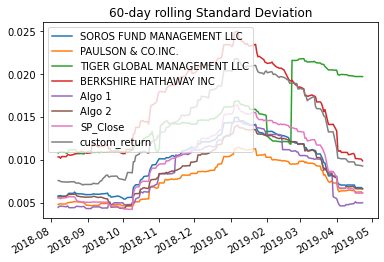

In [97]:
# Calculate rolling standard deviation
All_returns_2_60_STD = All_returns_2.rolling(window = 60).std()

# Plot rolling standard deviation
All_returns_2_60_STD.plot(kind = 'line',title = '60-day rolling Standard Deviation')


### Calculate and plot the correlation

In [98]:
# Calculate and plot the correlation
All_returns_2_corr = All_returns_2.corr()
All_returns_2_corr

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP_Close,custom_return
SOROS FUND MANAGEMENT LLC,1.000000,0.791962,0.478627,0.816675,0.337826,0.862846,0.876981,0.733250
PAULSON & CO.INC.,0.791962,1.000000,0.485375,0.650758,0.361301,0.783656,0.766680,0.644210
TIGER GLOBAL MANAGEMENT LLC,0.478627,0.485375,1.000000,0.325457,0.114554,0.409496,0.481030,0.391972
BERKSHIRE HATHAWAY INC,0.816675,0.650758,0.325457,1.000000,0.327000,0.782804,0.852303,0.801158
Algo 1,0.337826,0.361301,0.114554,0.327000,1.000000,0.365512,0.289358,0.261471
Algo 2,0.862846,0.783656,0.409496,0.782804,0.365512,1.000000,0.875721,0.739936
SP_Close,0.876981,0.766680,0.481030,0.852303,0.289358,0.875721,1.000000,0.871875
custom_return,0.733250,0.644210,0.391972,0.801158,0.261471,0.739936,0.871875,1.000000


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:title={'center':'60 day rolling beta'}>

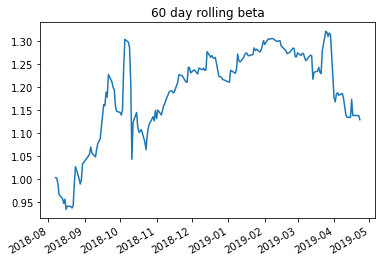

In [99]:
# Calculate and plot Beta
Prot_1_covar = All_returns_2['custom_return'].rolling(window= 60).cov(All_returns_2['SP_Close']).dropna()

# Calculate variance of S&P 500
All_returns_2_var= All_returns_2['SP_Close'].rolling(window= 60).var().dropna()
All_returns_2_var = All_returns_2_var.to_frame()

# Computing beta

Beta_matrix_2 = pd.concat([Prot_1_covar,All_returns_2_var], axis = 'columns', join= 'inner')

Beta_matrix_2.columns = ['COV', 'VAR'] 

beta_return = Beta_matrix_2.loc[:,'COV']/Beta_matrix_2.loc[:,'VAR']
#beta_algo.head()

# Plot beta trend
beta_return.plot(kind = 'line', title = '60 day rolling beta')

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [100]:
# Calculate Annualized Sharpe Ratios
Sharpe_ratios_2 =  (All_returns_2.mean()*252) /  Ann_All_returns_2_STD
Sharpe_ratios_2

SOROS FUND MANAGEMENT LLC      0.430713
PAULSON & CO.INC.              0.258738
TIGER GLOBAL MANAGEMENT LLC   -1.034216
BERKSHIRE HATHAWAY INC         0.159756
Algo 1                         2.035665
Algo 2                         0.080607
SP_Close                       0.584820
custom_return                  0.933123
dtype: float64

<AxesSubplot:>

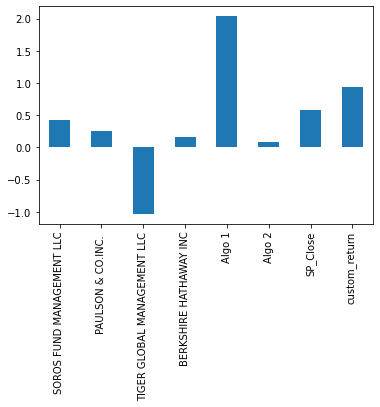

In [101]:
# Visualize the sharpe ratios as a bar plot
Sharpe_ratios_2.plot(kind = 'bar')

### How does your portfolio do?

Write your answer here!

the portfolio does better than most of the whales, however it is not as good as the Algo 1 portfolio. There are two qualifcations 1) we have ignored the dividen returs/reinvestment 2) the Algo 1 portfolio could expose you to higher taxes if the trades are short term in nature. 